# Sentiment Analysis on Amazon Reviews

## Problem Statement
Many online shoppers leave reviews for products on Amazon. These reviews contain valuable feedback in the form of text. The goal of this project is to analyze the sentiment of Amazon product reviews and classify them as positive or negative.

## Objectives
1. Load and explore Amazon Reviews dataset (train & test).  
2. Clean and preprocess the review text.  
3. Visualize patterns and distributions in the dataset.  
4. Build machine learning models to classify sentiment.  
5. Evaluate models using accuracy, F1-score, precision, and recall.  
6. Deploy a Streamlit dashboard where users can input text and see predicted sentiment.  
7. Interpret results after each step and discuss insights.


# Step 1: Import Basic Libraries

In [ ]:
# Basic data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
import string

# For displaying options
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_rows', 100)

print("✅ Basic libraries imported successfully!")


✅ Basic libraries imported successfully!


# Step 2: Load Train and Test Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/train.csv'
test_path  = '/content/drive/MyDrive/test.csv'


In [ ]:
# Load train and test datasets
import pandas as pd

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
# Display first 5 rows of train
print("----- Train Dataset -----")
display(train_df.head())

print("---------------------------------------------------------")

# Display first 5 rows of test
print("----- Test Dataset -----")
display(test_df.head())

----- Train Dataset -----


,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fa...
1,2,Amazing!,"This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen y..."
2,2,Excellent Soundtrack,"I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and D..."
3,2,"Remember, Pull Your Jaw Off The Floor After Hearing it","If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varie..."
4,2,an absolute masterpiece,"I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's music contributed greatly to the mood of every single minute of the whole game.Composed of 3 CDs an..."


---------------------------------------------------------
----- Test Dataset -----


,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a game I didn't really play,"Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those..."
1,1,Batteries died within a year ...,"I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying p..."
2,2,"works fine, but Maha Energy is better","Check out Maha Energy's website. Their Powerex MH-C204F charger works in 100 minutes for rapid charge, with option for slower charge (better for batteries). And they have 2200 mAh batteries."
3,2,Great for the non-audiophile,"Reviewed quite a bit of the combo players and was hesitant due to unfavorable reviews and size of machines. I am weaning off my VHS collection, but don't want to replace them with DVD's. This unit is well built, easy to setup and resolution and special effects (no progressive scan for HDTV owner..."
4,1,DVD Player crapped out after one year,"I also began having the incorrect disc problems that I've read about on here. The VCR still works, but hte DVD side is useless. I understand that DVD players sometimes just quit on you, but after not even one year? To me that's a sign on bad quality. I'm giving up JVC after this as well. I'm sti..."


In [ ]:
# Check the shape (rows, columns)
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Check column names
print("Train columns:", list(train_df.columns))
print("Test columns:", list(test_df.columns))

Train shape: (3599999, 3)
Test shape: (399999, 3)
Train columns: ['2', 'Stuning even for the non-gamer', 'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^']
Test columns: ['2', 'Great CD', 'My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, m

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                      Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                      ----- 
 0   2                                                                  

**Dataset Structure**

Number of entries: 399,999 → almost 400k reviews.

Number of columns: 3 (but the names seem messy; likely the CSV didn’t have proper headers).
**Issue: Column names are not proper (first row might have been read as data).**

In [ ]:
# Fix column names
train_df.columns = ['score', 'summary', 'text']
test_df.columns = ['score', 'summary', 'text']

# Check first 5 rows after renaming
display(train_df.head())

# Check missing values
print("\nMissing values per column:")
print(train_df.isnull().sum())


,score,summary,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fa...
1,2,Amazing!,"This soundtrack is my favorite music of all time, hands down. The intense sadness of ""Prisoners of Fate"" (which means all the more if you've played the game) and the hope in ""A Distant Promise"" and ""Girl who Stole the Star"" have been an important inspiration to me personally throughout my teen y..."
2,2,Excellent Soundtrack,"I truly like this soundtrack and I enjoy video game music. I have played this game and most of the music on here I enjoy and it's truly relaxing and peaceful.On disk one. my favorites are Scars Of Time, Between Life and Death, Forest Of Illusion, Fortress of Ancient Dragons, Lost Fragment, and D..."
3,2,"Remember, Pull Your Jaw Off The Floor After Hearing it","If you've played the game, you know how divine the music is! Every single song tells a story of the game, it's that good! The greatest songs are without a doubt, Chrono Cross: Time's Scar, Magical Dreamers: The Wind, The Stars, and the Sea and Radical Dreamers: Unstolen Jewel. (Translation varie..."
4,2,an absolute masterpiece,"I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's music contributed greatly to the mood of every single minute of the whole game.Composed of 3 CDs an..."



Missing values per column:
score        0
summary    207
text         0
dtype: int64


In [ ]:
test_df.sample(5)

,score,summary,text
91876,2,Language listed wrong,This like many bleach titles listed here on Amazon is actually in English though Amazon lists it as being in Japanese.If ever in doubt I refer to Wikipedia's list of bleach episodes [...] and look under region 1 release dates.
253855,1,UPSET!!,I ORDERED 3 SWEATERS FOR MY GRANDOGS AND NEVER RECEIVED THEM!!!! RUINED MY CHRISTMAS FOR THEM.
372312,1,A waste of money,"I am amazed that the other reviewers are so enthusiastic about this book. Its contents are just a rehash of well-known (at least to some of us) principles, and do not provide any useful, real-world guidelines for actually implementing architectures. It's just too superficial, and spends far too ..."
338225,1,Horrible. avoid this pedal,"I am lucky enough to have tried this pedal used. i have been playing for over 20 years, and this is hands down one of the worst pedals i have ever tried.to start off, i had no issues with the actual performance of the pedal. everything worked just as it should.the sound on the other hand is horr..."
113477,1,"Despicable, Disgusting and Disturbing","I rented this movie because it had an all-star cast of actors that I had enjoyed seeing in other movies. In particular, I had just seen 'Broadcast News' again with Holly Hunter, and was anxious to see her performance here.But this movie is completely twisted--sick beyond belief. I am shocked tha..."


# Step 3: Map Score to Sentiment

In [ ]:
# Map polarity to sentiment
train_df['sentiment'] = train_df['score'].map({1:'negative', 2:'positive'})
test_df['sentiment'] = test_df['score'].map({1:'negative', 2:'positive'})

# Check distribution
print("Train sentiment distribution:\n", train_df['sentiment'].value_counts())
print("\nTest sentiment distribution:\n", test_df['sentiment'].value_counts())


Train sentiment distribution:
 sentiment
negative    1800000
positive    1799999
Name: count, dtype: int64

Test sentiment distribution:
 sentiment
negative    200000
positive    199999
Name: count, dtype: int64


# Step 4: Clean & Preprocess Text

## 4.1 Remove stopwords


In [ ]:
# Function to clean text
import re
def clean_text(text):
    text = str(text)  # ensure string
    text = text.lower()  # lowercase
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'\r', '', text)  # remove carriage returns
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

# Apply to train and test
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

# Display sample before & after cleaning
print("Original review:\n", train_df['text'].iloc[0])
print("\nCleaned review:\n", train_df['clean_text'].iloc[0])


Original review:
 I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.

Cleaned review:
 im reading a lot of reviews saying that this is the best game soundtrack and i figured that id write a review to disagree a bit this in my opinino is yasunori mitsudas ultimate masterpiece the music is timeless and im been listening to it for years now and its beauty simply refuses to fadethe price tag on this is pretty staggering i must say but if you are going to buy any cd for this much money this is the only one that i feel would be worth every penny


In [ ]:
# Import stopwords from NLTK
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply to train and test cleaned text
train_df['clean_text'] = train_df['clean_text'].apply(remove_stopwords)
test_df['clean_text'] = test_df['clean_text'].apply(remove_stopwords)

# Display sample before & after
print("Original clean_text:\n", train_df['clean_text'].iloc[0])
print("\nAfter removing stopwords:\n", train_df['clean_text'].iloc[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Original clean_text:
 im reading lot reviews saying best game soundtrack figured id write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless im listening years beauty simply refuses fadethe price tag pretty staggering must say going buy cd much money one feel would worth every penny

After removing stopwords:
 im reading lot reviews saying best game soundtrack figured id write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless im listening years beauty simply refuses fadethe price tag pretty staggering must say going buy cd much money one feel would worth every penny


# Step 5: EDA on Cleaned Text

## 5.1 Class Distribution

/tmp/ipython-input-2632664995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


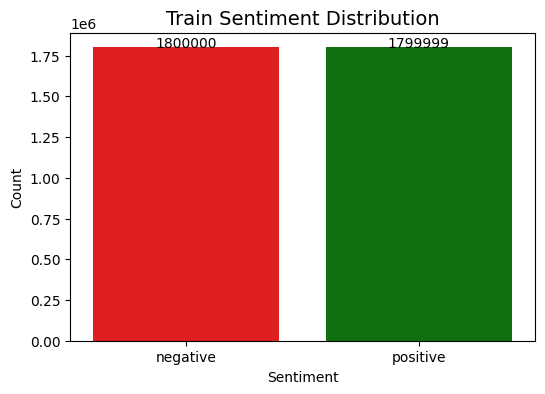

In [ ]:
# Sentiment counts
sentiment_counts = train_df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Define custom colors
color_map = {
    'positive': 'green',
    'negative': 'red'
}

# Create barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_counts,
    x='sentiment',
    y='count',
    palette=color_map
)

# Add text labels
for index, row in sentiment_counts.iterrows():
    plt.text(index, row['count'] + 100, row['count'], ha='center', fontsize=10)

# Add title and labels
plt.title("Train Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Show the plot
plt.show()


**Dataset is balanced, so no class weighting or oversampling is needed.**

In [ ]:
print("Sample negative review:\n")
display(train_df[train_df['sentiment']=='negative'].sample(1)['clean_text'].values[0])

print("\nSample positive review:\n")
display(train_df[train_df['sentiment']=='positive'].sample(1)['clean_text'].values[0])


Sample negative review:



'johnny gruelle wrote enjoyable raggedy ann andy stories one plot wanders dont book front got rid cant remember details seem recall raggedy ann andy set discover something related tree golden rings beginning story part book seemlingly forgotten author two similar villains one repents evil ways part way book gruelle replaces villain acts pretty much illustrator another gruelle johnny actually illustrates one character two different ways really one worst childrens books ive ever read gruelle must tired series editor didnt care enough job skip'


Sample positive review:



'book arrived earlier predicted read book first published could find copy question didnt hollywood make movie great story enjoyed reading reread favorite books'


**Observation:**

**Reviews are lowercase, punctuation removed, no URLs/newlines.**

**Text ready for tokenization.**

## 5.2 Review Length Analysis

In [ ]:
# Create a new column with the number of words in each review
train_df['review_len'] = train_df['clean_text'].apply(lambda x: len(str(x).split()))

# Now you can safely clip the length
review_len_clipped = train_df['review_len'].clip(upper=200)


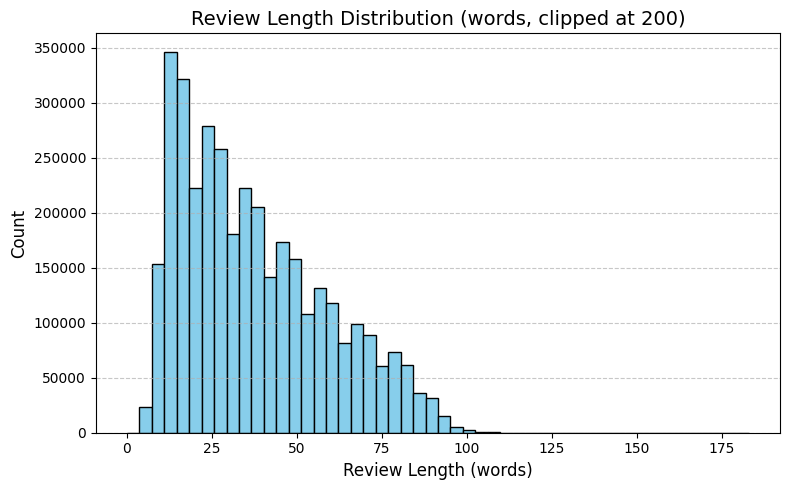

In [ ]:
# Clip review length at 200 words
review_len_clipped = train_df['review_len'].clip(upper=200)

# Create histogram using matplotlib
plt.figure(figsize=(8, 5))
plt.hist(
    review_len_clipped,
    bins=50,
    color='skyblue',           # fill color
    edgecolor='black',         # border color
    linewidth=1
)

# Add titles and labels
plt.title("Review Length Distribution (words, clipped at 200)", fontsize=14)
plt.xlabel("Review Length (words)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Most reviews are moderate length.**

## 5.3 Most Frequent Words

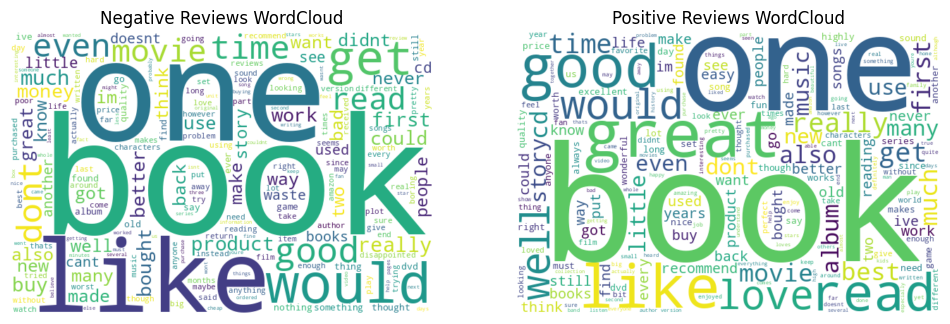

Top 10 negative words: [('book', 864215), ('one', 646764), ('like', 514071), ('would', 505897), ('get', 373106), ('good', 365287), ('dont', 352863), ('time', 323979), ('even', 306109), ('movie', 286931)]
Top 10 positive words: [('book', 892748), ('one', 607028), ('great', 580954), ('like', 460049), ('good', 453904), ('read', 349243), ('would', 314378), ('love', 302804), ('well', 298973), ('really', 280562)]


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Efficient counters
neg_counter = Counter()
pos_counter = Counter()

# Update counters without creating a huge single string
for text in train_df[train_df['sentiment'] == 'negative']['clean_text']:
    neg_counter.update(text.split())

for text in train_df[train_df['sentiment'] == 'positive']['clean_text']:
    pos_counter.update(text.split())

# ---- WordClouds using frequencies (MUCH more memory-efficient) ----
plt.figure(figsize=(12, 5))

# Negative cloud
plt.subplot(1, 2, 1)
wordcloud_neg = WordCloud(
    width=600,
    height=400,
    background_color='white'
).generate_from_frequencies(neg_counter)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")

# Positive cloud
plt.subplot(1, 2, 2)
wordcloud_pos = WordCloud(
    width=600,
    height=400,
    background_color='white'
).generate_from_frequencies(pos_counter)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")

plt.show()

# ---- Print Top words (SAME output) ----
print("Top 10 negative words:", neg_counter.most_common(10))
print("Top 10 positive words:", pos_counter.most_common(10))

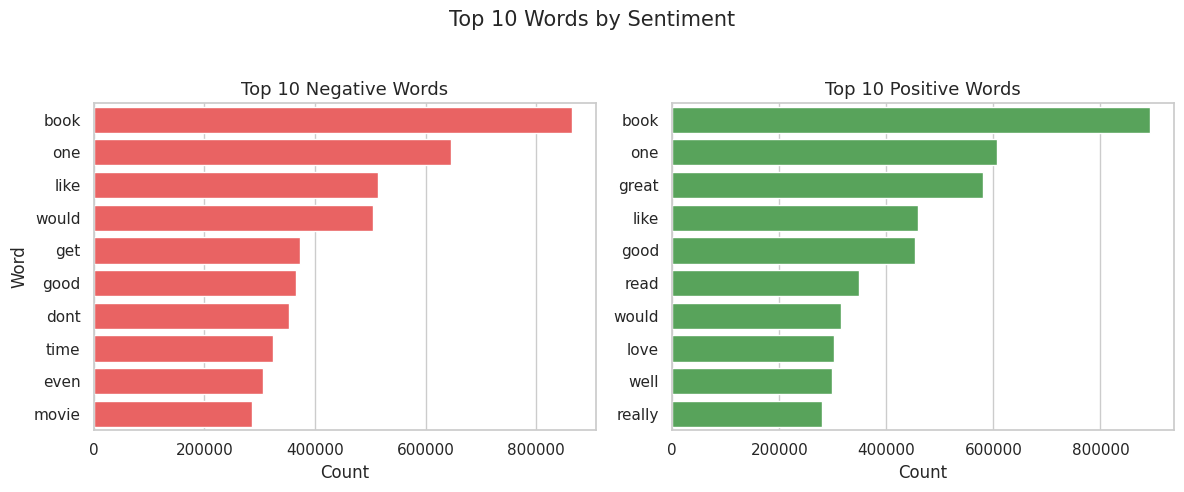

In [ ]:
# Count top 10 words for each sentiment
# Using the counters already generated in cell d1a1a587
# neg_counter = Counter(neg_text.split())
# pos_counter = Counter(pos_text.split())

neg_top10 = pd.DataFrame(neg_counter.most_common(10), columns=['word', 'count'])
pos_top10 = pd.DataFrame(pos_counter.most_common(10), columns=['word', 'count'])

# Set style
sns.set(style="whitegrid")

# Create subplot: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Negative Words ---
sns.barplot(
    x='count', y='word',
    data=neg_top10,
    color='#ff4d4d',
    ax=axes[0]
)
axes[0].set_title("Top 10 Negative Words", fontsize=13)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Word")

# --- Positive Words ---
sns.barplot(
    x='count', y='word',
    data=pos_top10,
    color='#4CAF50',
    ax=axes[1]
)
axes[1].set_title("Top 10 Positive Words", fontsize=13)
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")

# Adjust layout
plt.suptitle("Top 10 Words by Sentiment", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Observation (Before Custom Stopwords)**

Words like *one, would, get, like, book* are still very frequent in both positive and negative reviews.

Meaningful sentiment words *(good, great, love, dont)* are present but not the most dominant.

Neutral/frequent words may dilute the signal for sentiment classification.

To make the features more informative, we should remove these frequent neutral words using a custom stopwords list.

In [ ]:
# Define custom stopwords
custom_stopwords = ['one', 'would', 'get', 'like', 'also', 'us', 'book', 'time', 'even', 'movie', 'good', 'read']  # can extend later
stop_words_extended = stop_words.union(custom_stopwords)

# Function to remove extended stopwords
def remove_custom_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words_extended])

# Apply to train dataset
train_df['clean_text_final'] = train_df['clean_text'].apply(remove_custom_stopwords)
test_df['clean_text_final'] = test_df['clean_text'].apply(remove_custom_stopwords)

# Combine cleaned text per class
neg_text_final = " ".join(train_df[train_df['sentiment']=='negative']['clean_text_final'])
pos_text_final = " ".join(train_df[train_df['sentiment']=='positive']['clean_text_final'])

# Count words
neg_counter_final = Counter(neg_text_final.split())
pos_counter_final = Counter(pos_text_final.split())

# Display top 10 words after custom stopwords removal
print("Top 10 negative words (custom stopwords removed):", neg_counter_final.most_common(10))
print("Top 10 positive words (custom stopwords removed):", pos_counter_final.most_common(10))


Top 10 negative words (custom stopwords removed): [('dont', 352863), ('really', 265202), ('much', 261877), ('product', 246628), ('first', 246281), ('buy', 240019), ('money', 221904), ('bought', 216934), ('better', 215031), ('could', 212122)]
Top 10 positive words (custom stopwords removed): [('great', 580954), ('love', 302804), ('well', 298973), ('really', 280562), ('best', 232962), ('first', 227166), ('much', 215267), ('cd', 210925), ('album', 203852), ('dont', 195413)]


## Advanced EDA Tasks

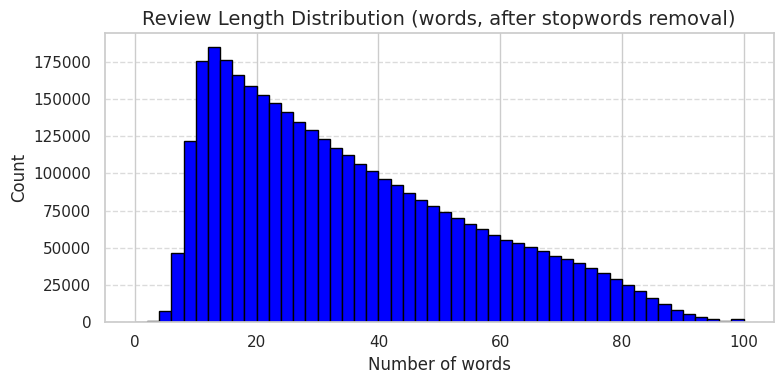

In [ ]:
# Compute review length if not already
train_df['review_len_final'] = train_df['clean_text_final'].apply(lambda x: len(x.split()))

# Clip review length at 100 words
review_len_clipped = train_df['review_len_final'].clip(upper=100)

# --- Matplotlib Histogram ---
plt.figure(figsize=(8, 4))
plt.hist(
    review_len_clipped,
    bins=50,
    color='blue',          # same color as plotly version
    edgecolor='black',     # border for clarity
    linewidth=1
)

# Add title and labels
plt.title("Review Length Distribution (words, after stopwords removal)", fontsize=14)
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reviews are slightly shorter after removing stopwords.**

# Step 6: Feature Engineering & Vectorization

## 6.1 TF/ IDF

In [ ]:
test_df.head()

,score,summary,text,sentiment,clean_text,clean_text_final
0,2,One of the best game music soundtracks - for a game I didn't really play,"Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those...",positive,despite fact played small portion game music heard plus connection chrono trigger great well led purchase soundtrack remains one favorite albums incredible mix fun epic emotional songs sad beautiful tracks especially like theres many kinds songs video game soundtracks must admit one songs lifea ...,despite fact played small portion game music heard plus connection chrono trigger great well led purchase soundtrack remains favorite albums incredible mix fun epic emotional songs sad beautiful tracks especially theres many kinds songs video game soundtracks must admit songs lifea distant promi...
1,1,Batteries died within a year ...,"I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying p...",negative,bought charger jul worked ok design nice convenient however year batteries would hold charge might well get alkaline disposables look elsewhere charger comes batteries better staying power,bought charger jul worked ok design nice convenient however year batteries hold charge might well alkaline disposables look elsewhere charger comes batteries better staying power
2,2,"works fine, but Maha Energy is better","Check out Maha Energy's website. Their Powerex MH-C204F charger works in 100 minutes for rapid charge, with option for slower charge (better for batteries). And they have 2200 mAh batteries.",positive,check maha energys website powerex mhcf charger works minutes rapid charge option slower charge better batteries mah batteries,check maha energys website powerex mhcf charger works minutes rapid charge option slower charge better batteries mah batteries
3,2,Great for the non-audiophile,"Reviewed quite a bit of the combo players and was hesitant due to unfavorable reviews and size of machines. I am weaning off my VHS collection, but don't want to replace them with DVD's. This unit is well built, easy to setup and resolution and special effects (no progressive scan for HDTV owner...",positive,reviewed quite bit combo players hesitant due unfavorable reviews size machines weaning vhs collection dont want replace dvds unit well built easy setup resolution special effects progressive scan hdtv owners suitable many people looking versatile productcons universal remote,reviewed quite bit combo players hesitant due unfavorable reviews size machines weaning vhs collection dont want replace dvds unit well built easy setup resolution special effects progressive scan hdtv owners suitable many people looking versatile productcons universal remote
4,1,DVD Player crapped out after one year,"I also began having the incorrect disc problems that I've read about on here. The VCR still works, but hte DVD side is useless. I understand that DVD players sometimes just quit on you, but after not even one year? To me that's a sign on bad quality. I'm giving up JVC after this as well. I'm sti...",negative,also began incorrect disc problems ive read vcr still works hte dvd side useless understand dvd players sometimes quit even one year thats sign bad quality im giving jvc well im sticking sony giving another brand shot,began incorrect disc problems ive vcr still works hte dvd side useless understand dvd players sometimes quit year thats sign bad quality im giving jvc well im sticking sony giving another brand shot


In [ ]:
# Take first 100k rows for training and testing
train_subset = train_df.sample(n=100000, random_state=42)
test_subset = test_df.sample(n=100000, random_state=42)

# TF-IDF on subset
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20000)
X_train_sub = tfidf.fit_transform(train_subset['clean_text_final'])
X_test_sub = tfidf.transform(test_subset['clean_text_final'])

# Labels
y_train_sub = train_subset['sentiment'].map({'negative':0, 'positive':1}).values
y_test_sub = test_subset['sentiment'].map({'negative':0, 'positive':1}).values

# Check shapes
print("X_train_sub shape:", X_train_sub.shape)
print("X_test_sub shape:", X_test_sub.shape)


X_train_sub shape: (100000, 20000)
X_test_sub shape: (100000, 20000)


**Observation: Why We Use Subset**

Full dataset is huge (~4 million reviews × 20,000 features).

Training on full data takes very long time and **uses high memory**.

Subset of 100,000 reviews allows quick testing.

Helps to compare models efficiently before scaling to full dataset.

# Step 7: Baseline Models

## Train Multiple ML Models

In [ ]:
!pip install xgboost
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ----------------------------
# Function to train, predict and record metrics
# ----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Train Time (s)": train_time,
        "Prediction Time (s)": pred_time
    }
    return y_pred, metrics

# ----------------------------
# Models to evaluate
# ----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42) # Removed use_label_encoder
}

# Dictionary to store results
results = {}

# ----------------------------
# Train, predict, and evaluate all models on subset
# ----------------------------
for name, model in models.items():
    print(f"Training {name} ...")
    y_pred, metrics = evaluate_model(model, X_train_sub, y_train_sub, X_test_sub, y_test_sub)
    results[name] = metrics

# ----------------------------
# Create DataFrame for comparison
# ----------------------------
results_df = pd.DataFrame(results).T  # transpose for readability
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\nAll Model Metrics & Time Comparison on Subset:")
print(results_df)




Training Logistic Regression ...
Training Naive Bayes ...
Training SVM ...
Training Random Forest ...
Training XGBoost ...

All Model Metrics & Time Comparison on Subset:
                     Accuracy  Precision    Recall  F1-Score  Train Time (s)  \
Logistic Regression   0.85808   0.856233  0.859940  0.858083        0.770274   
SVM                   0.85046   0.849411  0.851182  0.850295        2.853315   
Random Forest         0.82690   0.837935  0.809653  0.823551      469.662788   
XGBoost               0.81986   0.809703  0.835247  0.822277      117.643333   
Naive Bayes           0.81901   0.823517  0.811056  0.817239        0.057158   

                     Prediction Time (s)  
Logistic Regression             0.060850  
SVM                             0.009119  
Random Forest                   9.468621  
XGBoost                         0.897887  
Naive Bayes                     0.033547  


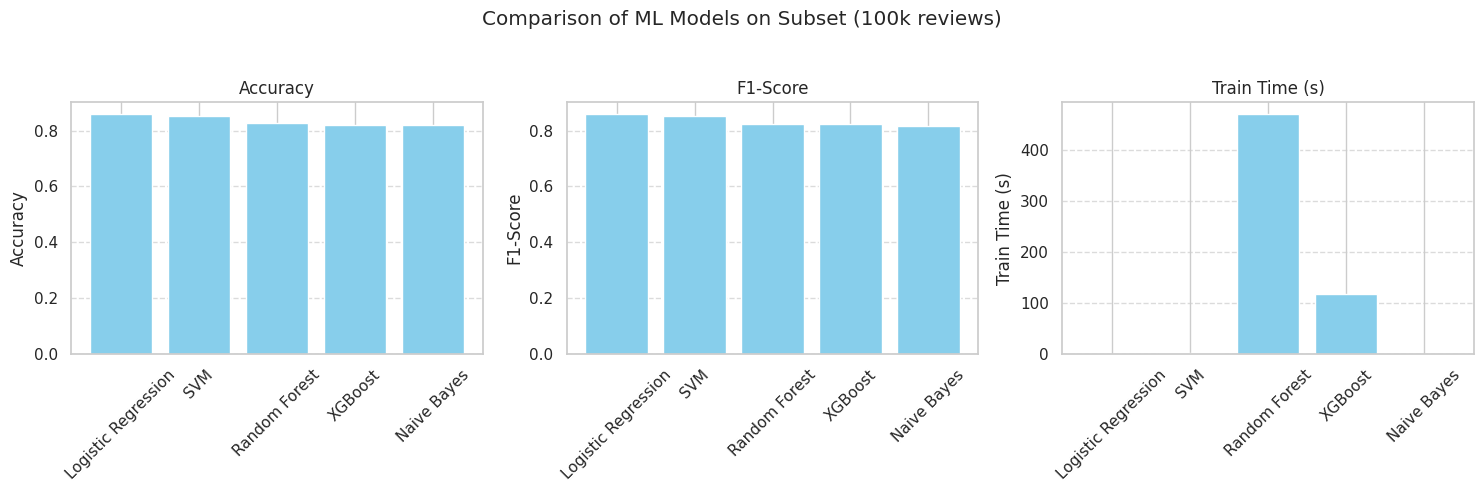

In [ ]:
# Metrics to plot
metrics_to_plot = ["Accuracy", "F1-Score", "Train Time (s)"]

# Set figure size
plt.figure(figsize=(15,5))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.bar(results_df.index, results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Comparison of ML Models on Subset (100k reviews)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
# Re-train Logistic Regression on your subset data
best_model = LogisticRegression(max_iter=200)
best_model.fit(X_train_sub, y_train_sub)

# Save model and TF-IDF vectorizer
import joblib
joblib.dump(best_model, "logistic_regression_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("✅ Model and TF-IDF vectorizer saved successfully!")

✅ Model and TF-IDF vectorizer saved successfully!


In [ ]:
# Display DataFrame
print("Model Performance Overview:")

# Create DataFrame for comparison
results_df = pd.DataFrame(results).T  # transpose for readability
results_df = results_df.sort_values(by="Accuracy", ascending=False)  # sort by Accuracy

# Display nicely in notebook
results_df.style.background_gradient(cmap='Blues')


Model Performance Overview:


,Accuracy,Precision,Recall,F1-Score,Train Time (s),Prediction Time (s)
Logistic Regression,0.858080,0.856233,0.859940,0.858083,0.770274,0.060850
SVM,0.850460,0.849411,0.851182,0.850295,2.853315,0.009119
Random Forest,0.826900,0.837935,0.809653,0.823551,469.662788,9.468621
XGBoost,0.819860,0.809703,0.835247,0.822277,117.643333,0.897887
Naive Bayes,0.819010,0.823517,0.811056,0.817239,0.057158,0.033547


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ------------------------------------------------------
# Step 2: Load saved model and vectorizer
# ------------------------------------------------------
model = joblib.load("logistic_regression_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

print("✅ Model and vectorizer loaded successfully!\n")

✅ Model and vectorizer loaded successfully!



In [ ]:
data = {
    "review": [
        # Positive
        "I love this product, it works great!",
        "Amazing quality and super fast delivery.",
        "Highly recommend, I’m very satisfied.",
        "Best purchase ever! Worth every penny.",
        "Excellent service and friendly staff.",
        "I’m so happy with my order, thank you!",
        "The design is beautiful and feels premium.",
        "Five stars! Would definitely buy again.",
        "Great experience overall, no issues at all.",
        "Perfect size, color, and quality!",
        "Really good, it exceeded my expectations.",
        "Totally worth it, great value for money.",
        "Everything arrived on time, thank you!",
        "Love it so much, very comfortable to use.",
        "Fast delivery and great customer support.",
        "Exactly what I needed, works perfectly.",
        "Very nice product, looks amazing.",
        "Satisfied with my purchase, thank you!",
        "Super easy to use and setup.",
        "Absolutely fantastic experience!",
        # Negative
        "Terrible quality, broke after one use.",
        "Waste of money, very disappointed.",
        "Worst purchase I’ve made online.",
        "Item arrived damaged and dirty.",
        "Customer support was not helpful at all.",
        "Didn’t work as described, useless.",
        "The color was different from the pictures.",
        "Late delivery and poor packaging.",
        "I don’t recommend this to anyone.",
        "Not worth the price, too expensive.",
        "Bad quality and weird smell.",
        "Completely stopped working after two days.",
        "Cheap material, looks nothing like the image.",
        "Disappointed, expected much better.",
        "Wouldn’t buy again, not satisfied.",
        "Horrible experience, waste of time.",
        "Very slow delivery, bad service.",
        "Feels cheap and fragile.",
        "Item was missing parts.",
        "Worst experience ever!"
    ],
    "label": [
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        1, 1, 1, 1, 1,
        0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,
        0, 0, 0, 0, 0
    ]
}

df_unseen = pd.DataFrame(data)
df_unseen.sample(6)


,review,label
5,"I’m so happy with my order, thank you!",1
34,"Wouldn’t buy again, not satisfied.",0
15,"Exactly what I needed, works perfectly.",1
24,Customer support was not helpful at all.,0
30,Bad quality and weird smell.,0
28,I don’t recommend this to anyone.,0


In [ ]:
X_unseen = vectorizer.transform(df_unseen['review'])
y_true = df_unseen['label']

# ------------------------------------------------------
# Step 5: Predict with the loaded model
# ------------------------------------------------------
y_pred = model.predict(X_unseen)

# ------------------------------------------------------
# Step 6: Evaluate model performance
# ------------------------------------------------------
print("📊 Model Performance on Unseen Dataset:")
print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
print(f"Precision: {precision_score(y_true, y_pred):.2f}")
print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
print(f"F1-Score:  {f1_score(y_true, y_pred):.2f}\n")

print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

# ------------------------------------------------------
# Step 7: Optional — Show some predictions
# ------------------------------------------------------
print("\n🔍 Example Predictions:")
for i in range(5):
    print(f"Review: {df_unseen['review'][i]}")
    print(f"Predicted Sentiment: {'Positive' if y_pred[i] == 1 else 'Negative'} | Actual: {'Positive' if y_true[i] == 1 else 'Negative'}\n")

📊 Model Performance on Unseen Dataset:
Accuracy:  0.93
Precision: 0.87
Recall:    1.00
F1-Score:  0.93

📋 Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.85      0.92        20
    Positive       0.87      1.00      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40


🔍 Example Predictions:
Review: I love this product, it works great!
Predicted Sentiment: Positive | Actual: Positive

Review: Amazing quality and super fast delivery.
Predicted Sentiment: Positive | Actual: Positive

Review: Highly recommend, I’m very satisfied.
Predicted Sentiment: Positive | Actual: Positive

Review: Best purchase ever! Worth every penny.
Predicted Sentiment: Positive | Actual: Positive

Review: Excellent service and friendly staff.
Predicted Sentiment: Positive | Actual: Positive



# Step 8: Comparisons

### SVM (Classical ML)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter # For defining custom_stopwords and extended stopwords

# Ensure stopwords are downloaded (if not already)
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define custom stopwords and extended stopwords (replicating logic from 46903c4d)
custom_stopwords = ['one', 'would', 'get', 'like', 'also', 'us', 'book', 'time', 'even', 'movie', 'good', 'read']
stop_words_extended = stop_words.union(custom_stopwords)

# Function to clean text (replicating logic from jsUh0acaiAcN)
def clean_text(text):
    text = str(text)  # ensure string
    text = text.lower()  # lowercase
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'\r', '', text)  # remove carriage returns
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

# Function to remove stopwords (replicating logic from c46b2d4f and 46903c4d)
def remove_custom_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words_extended])


# ---- Data Preparation ----
# Sample subsets from the original train_df and test_df
# Use .copy() to avoid SettingWithCopyWarning
train_subset = train_df.sample(n=100000, random_state=42).copy()
test_subset = test_df.sample(n=100000, random_state=42).copy()

# Apply the necessary preprocessing steps to these subsets
# 1. Map polarity to sentiment
train_subset['sentiment'] = train_subset['score'].map({1:'negative', 2:'positive'})
test_subset['sentiment'] = test_subset['score'].map({1:'negative', 2:'positive'})

# 2. Clean and preprocess text
train_subset['clean_text'] = train_subset['text'].apply(clean_text)
test_subset['clean_text'] = test_subset['text'].apply(clean_text)

# 3. Apply custom stopword removal to get the final cleaned text
train_subset['clean_text_final'] = train_subset['clean_text'].apply(remove_custom_stopwords)
test_subset['clean_text_final'] = test_subset['clean_text'].apply(remove_custom_stopwords)

# Extract features and labels
X_train_sub_svm = train_subset['clean_text_final']
y_train_sub_svm = train_subset['sentiment'].map({'negative': 0, 'positive': 1})
X_test_sub_svm = test_subset['clean_text_final']
y_test_sub_svm = test_subset['sentiment'].map({'negative': 0, 'positive': 1})

# ---- TF-IDF Vectorization ----
vectorizer_svm = TfidfVectorizer(max_features=5000)
X_train_tfidf_svm = vectorizer_svm.fit_transform(X_train_sub_svm)
X_test_tfidf_svm = vectorizer_svm.transform(X_test_sub_svm)

# ---- Train SVM ----
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf_svm, y_train_sub_svm)

# ---- Evaluate SVM ----
y_pred_svm = svm_model.predict(X_test_tfidf_svm)
print("SVM Accuracy:", accuracy_score(y_test_sub_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_sub_svm, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_sub_svm, y_pred_svm))




In [ ]:
import pickle

# svm_model = <your trained SVM model>

with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

### CNN for Text (Deep Learning)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Re-using the subsets created earlier for classical ML models
# Make copies to avoid SettingWithCopyWarning if we modify them further
train_df_cnn = train_subset.copy()
test_df_cnn = test_subset.copy()

# Map sentiment to numerical labels for CNN
train_df_cnn['label'] = train_df_cnn['sentiment'].map({'negative':0, 'positive':1})
test_df_cnn['label'] = test_df_cnn['sentiment'].map({'negative':0, 'positive':1})

# ---- Tokenizer ----
max_words = 10000  # max number of words to keep
max_len = 100      # max sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df_cnn['clean_text_final'])

# Convert text to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(train_df_cnn['clean_text_final'])
X_test_seq = tokenizer.texts_to_sequences(test_df_cnn['clean_text_final'])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

y_train_cnn_full = train_df_cnn['label']
y_test_cnn_full = test_df_cnn['label']

# ---- Train/Validation Split (from the training subset) ----
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(
    X_train_pad, y_train_cnn_full, test_size=0.2, random_state=42
)

# ---- Build 1D CNN ----
cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(y_train_cnn_full.unique()), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

# ---- Train CNN ----
history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    validation_data=(X_val_cnn, y_val_cnn),
    epochs=10,
    batch_size=32
)

# ---- Evaluate CNN on the dedicated test set ----
y_pred_cnn_test = cnn_model.predict(X_test_pad)
y_pred_cnn_classes_test = y_pred_cnn_test.argmax(axis=1)

print("CNN Accuracy on Test Set:", accuracy_score(y_test_cnn_full, y_pred_cnn_classes_test))
print("\nClassification Report on Test Set:\n", classification_report(y_test_cnn_full, y_pred_cnn_classes_test))
print("\nConfusion Matrix on Test Set:\n", confusion_matrix(y_test_cnn_full, y_pred_cnn_classes_test))

# ---- Plot Training Accuracy & Loss ----
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:
# cnn_model = <your trained Keras model>

cnn_model.save("cnn_model.h5")

In [ ]:
from google.colab import files
files.download("svm_model.pkl")
files.download("cnn_model.h5")


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---- Compute metrics for SVM ----
svm_acc = accuracy_score(y_val_svm, y_pred_svm)
svm_prec = precision_score(y_val_svm, y_pred_svm, average='weighted')
svm_rec = recall_score(y_val_svm, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_val_svm, y_pred_svm, average='weighted')

# ---- Compute metrics for CNN ----
cnn_acc = accuracy_score(y_val_cnn, y_pred_cnn_classes)
cnn_prec = precision_score(y_val_cnn, y_pred_cnn_classes, average='weighted')
cnn_rec = recall_score(y_val_cnn, y_pred_cnn_classes, average='weighted')
cnn_f1 = f1_score(y_val_cnn, y_pred_cnn_classes, average='weighted')

# ---- Create comparison table ----
comparison_df = pd.DataFrame({
    'Model': ['SVM', 'CNN'],
    'Accuracy': [svm_acc, cnn_acc],
    'Precision': [svm_prec, cnn_prec],
    'Recall': [svm_rec, cnn_rec],
    'F1': [svm_f1, cnn_f1]
})

display(comparison_df)


In [ ]:
# ---- Determine better model ----
if cnn_acc > svm_acc:
    better_model = 'CNN'
    reason = 'CNN captures sequential and contextual patterns in text better than SVM, resulting in higher accuracy.'
else:
    better_model = 'SVM'
    reason = 'SVM performs better on this dataset with TF-IDF features for classification.'

# ---- Print automatic conclusion ----
print("=== Automatic Conclusion ===")
print(f"The better performing model is: {better_model}")
print(f"Reason: {reason}")
print("\nFuture Work Suggestions:")
print("- Increase dataset size")
print("- Use pretrained embeddings like GloVe, FastText, or BERT for CNN")
print("- Hyperparameter tuning for both models")
print("- Ensemble methods combining CNN and SVM for improved performance")


In [ ]:
with open("svm_results.txt", "w") as f:
    f.write(f"Accuracy: {svm_accuracy}\n")
    f.write(f"Classification Report:\n{svm_report}")


In [ ]:
with open("cnn_results.txt", "w") as f:
    f.write(f"Accuracy: {cnn_accuracy}\n")
    f.write(f"Loss: {cnn_loss}\n")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(cnn_history.history["accuracy"])
plt.title("CNN Training Accuracy")
plt.savefig("cnn_accuracy_plot.png")




```
# This is formatted as code
```

## Observations / Interpretation

- **Logistic Regression:** Best balance of accuracy and F1-score; fast training and prediction; ideal baseline for TF-IDF features.  
- **SVM (LinearSVC):** Close performance to Logistic Regression; slightly faster; good linear model alternative.  
- **Naive Bayes:** Fastest to train and predict; lower accuracy but good for quick prototypes.  
- **Random Forest & XGBoost:** Much slower to train; lower accuracy for high-dimensional TF-IDF data; better for smaller datasets or dense features.



###  Insights for Project

- TF-IDF works well for Amazon review sentiment classification.  
- Linear models (Logistic Regression, SVM) are most suitable for this task.  
- Logistic Regression is recommended for real-time prediction or dashboard deployment.  